In [1]:
from IPython.display import display


def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)

In [2]:
import csv
import math
from collections import defaultdict

directions_order = ["Marseille", "Bordeaux", "Rouen", "Nantes",  "La Rochelle", "Bayonne"]

data = []
with open("evolution_directions_fermes_local.csv", "r") as data_f, open("regressions_local.csv", "r") as reg_data_f:
    reg_data = defaultdict(dict)
    for f in list(csv.DictReader(reg_data_f)):
        reg_data[f['direction_ferme']][f['kind']] = f
    for d in csv.DictReader(data_f):
        slope = float(reg_data[d['direction_ferme']][d['kind']]['slope'])
        data.append({
            "year": d['year'],
            "value": float(d['value']) if d['value']!='' else None, 
            "kind" : d['kind'],
            "slope" : f"{d['direction_ferme']} {'+' if slope>0 else ''}{slope*100:0.1f}%/an",
            "reg_point": math.exp(slope*float(d['year'])+float(reg_data[d['direction_ferme']][d['kind']]['intercept'])) ,
            "peace_reg_memory": float(d['peace_reg_memory']) if d['peace_reg_memory'] !='' else None,
            "peace_reg": float(d['peace_reg']) if d['peace_reg'] !='' else None,
            "direction_ferme": d['direction_ferme'],
            "column_order": directions_order.index(d['direction_ferme']),
            "avg_loss_mem": f"Perte memoire{float(reg_data[d['direction_ferme']][d['kind']]['avg_loss_mem'])*100:0.1f}%",
            "avg_loss_no_mem": f"Perte {float(reg_data[d['direction_ferme']][d['kind']]['avg_loss_no_mem'])*100:0.1f}%"
            })



In [3]:
data

[{'year': '1716',
  'value': None,
  'kind': 'total',
  'slope': 'Marseille +1.1%/an',
  'reg_point': 75300694.7051798,
  'peace_reg_memory': None,
  'peace_reg': None,
  'direction_ferme': 'Marseille',
  'column_order': 0,
  'avg_loss_mem': 'Perte memoire-39.5%',
  'avg_loss_no_mem': 'Perte -30.6%'},
 {'year': '1717',
  'value': None,
  'kind': 'total',
  'slope': 'Marseille +1.1%/an',
  'reg_point': 76157679.65614982,
  'peace_reg_memory': None,
  'peace_reg': None,
  'direction_ferme': 'Marseille',
  'column_order': 0,
  'avg_loss_mem': 'Perte memoire-39.5%',
  'avg_loss_no_mem': 'Perte -30.6%'},
 {'year': '1718',
  'value': None,
  'kind': 'total',
  'slope': 'Marseille +1.1%/an',
  'reg_point': 77024417.8133696,
  'peace_reg_memory': None,
  'peace_reg': None,
  'direction_ferme': 'Marseille',
  'column_order': 0,
  'avg_loss_mem': 'Perte memoire-39.5%',
  'avg_loss_no_mem': 'Perte -30.6%'},
 {'year': '1719',
  'value': None,
  'kind': 'total',
  'slope': 'Marseille +1.1%/an',
  '

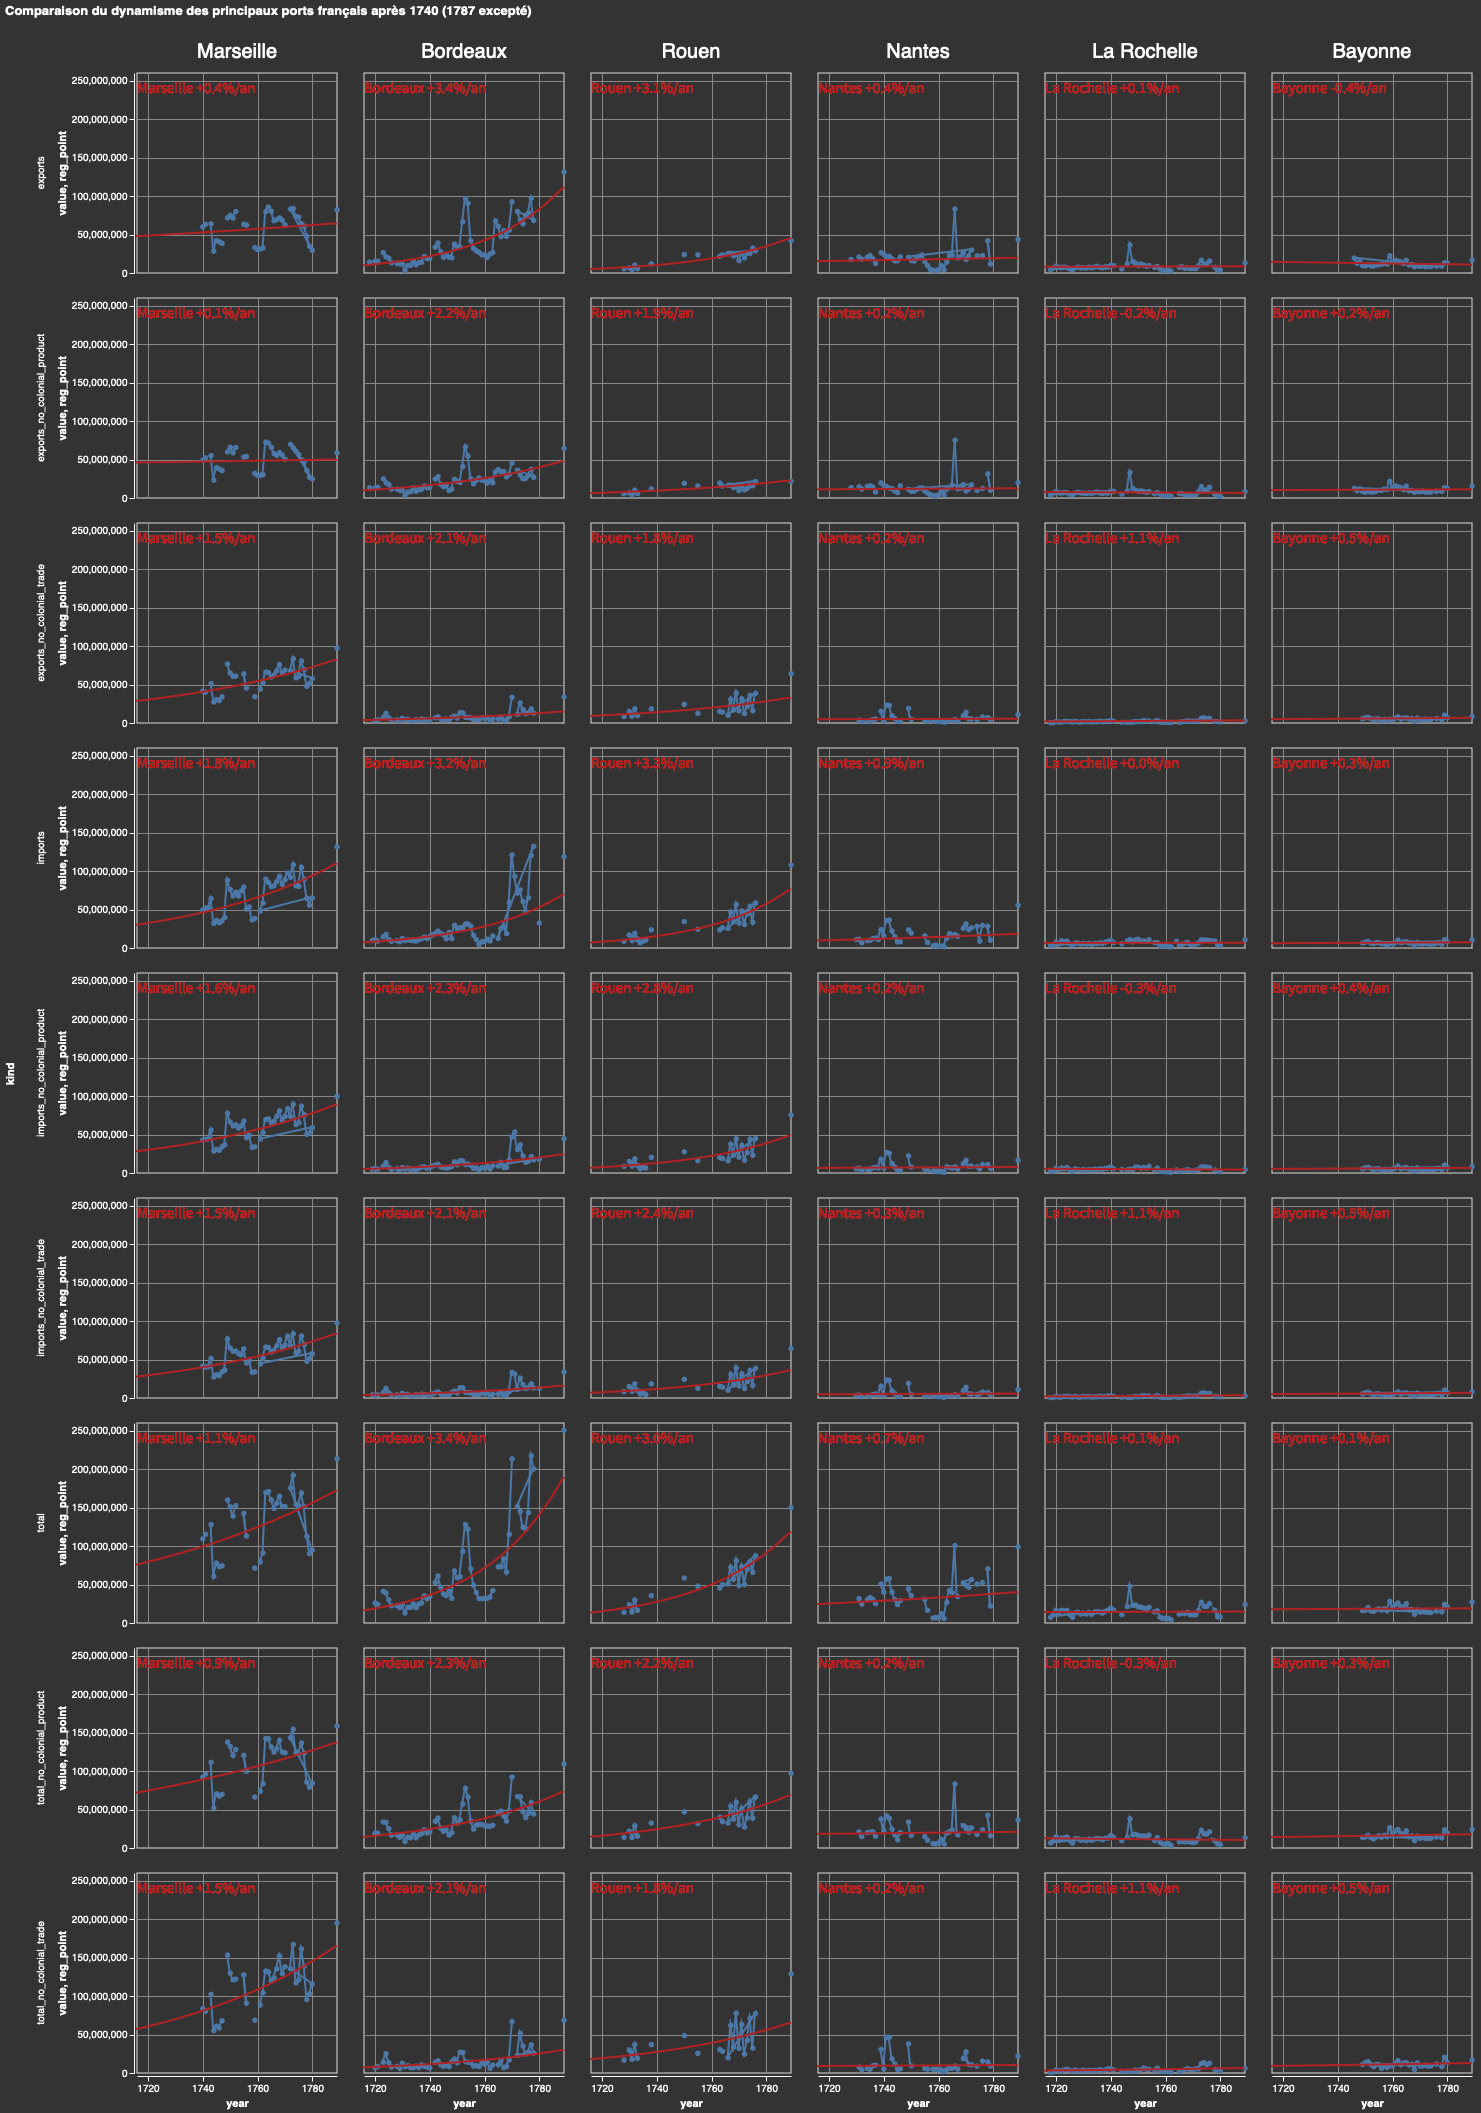

In [4]:

  VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "title": "Comparaison du dynamisme des principaux ports français après 1740 (1787 excepté)",
    "data": {"values": data},
    "facet":{
      "column" : {"field": "direction_ferme", 
                  "header": {"titleFontSize": 0, "labelFontSize": 20},
                  "sort": {"field": "column_order", "order": "ascending"}},
      "row": {"field" : "kind"}
    },
    "spec":{
    "layer": [
      {
        "mark": {
          "type": "line",
          "point": True
        },
        "encoding": {
          "x": {
            "field": "year",
            "type": "temporal",
          
          },
          "y": {
            "field": "value",
            "type": "quantitative"
          }
        }
      },
      {
        "mark": {
          "type": "line",
          "color": "firebrick"
        },
        "encoding": {
          "x": {
            "field": "year",
            "type": "temporal",
          },
          "y": {
            "field": "reg_point",
            "type": "quantitative"
          }
        }
      },
      {
      
      "mark": {
        "type": "text",
        "color": "firebrick",
        "x": "0",
        "align": "left",
        "y": 15,
        "fontSize": 15,
        "font": "sans serif"
      },
      "encoding": {
        "text": {"type": "nominal", "field": "slope"}
      }
    },

    ]}
  })

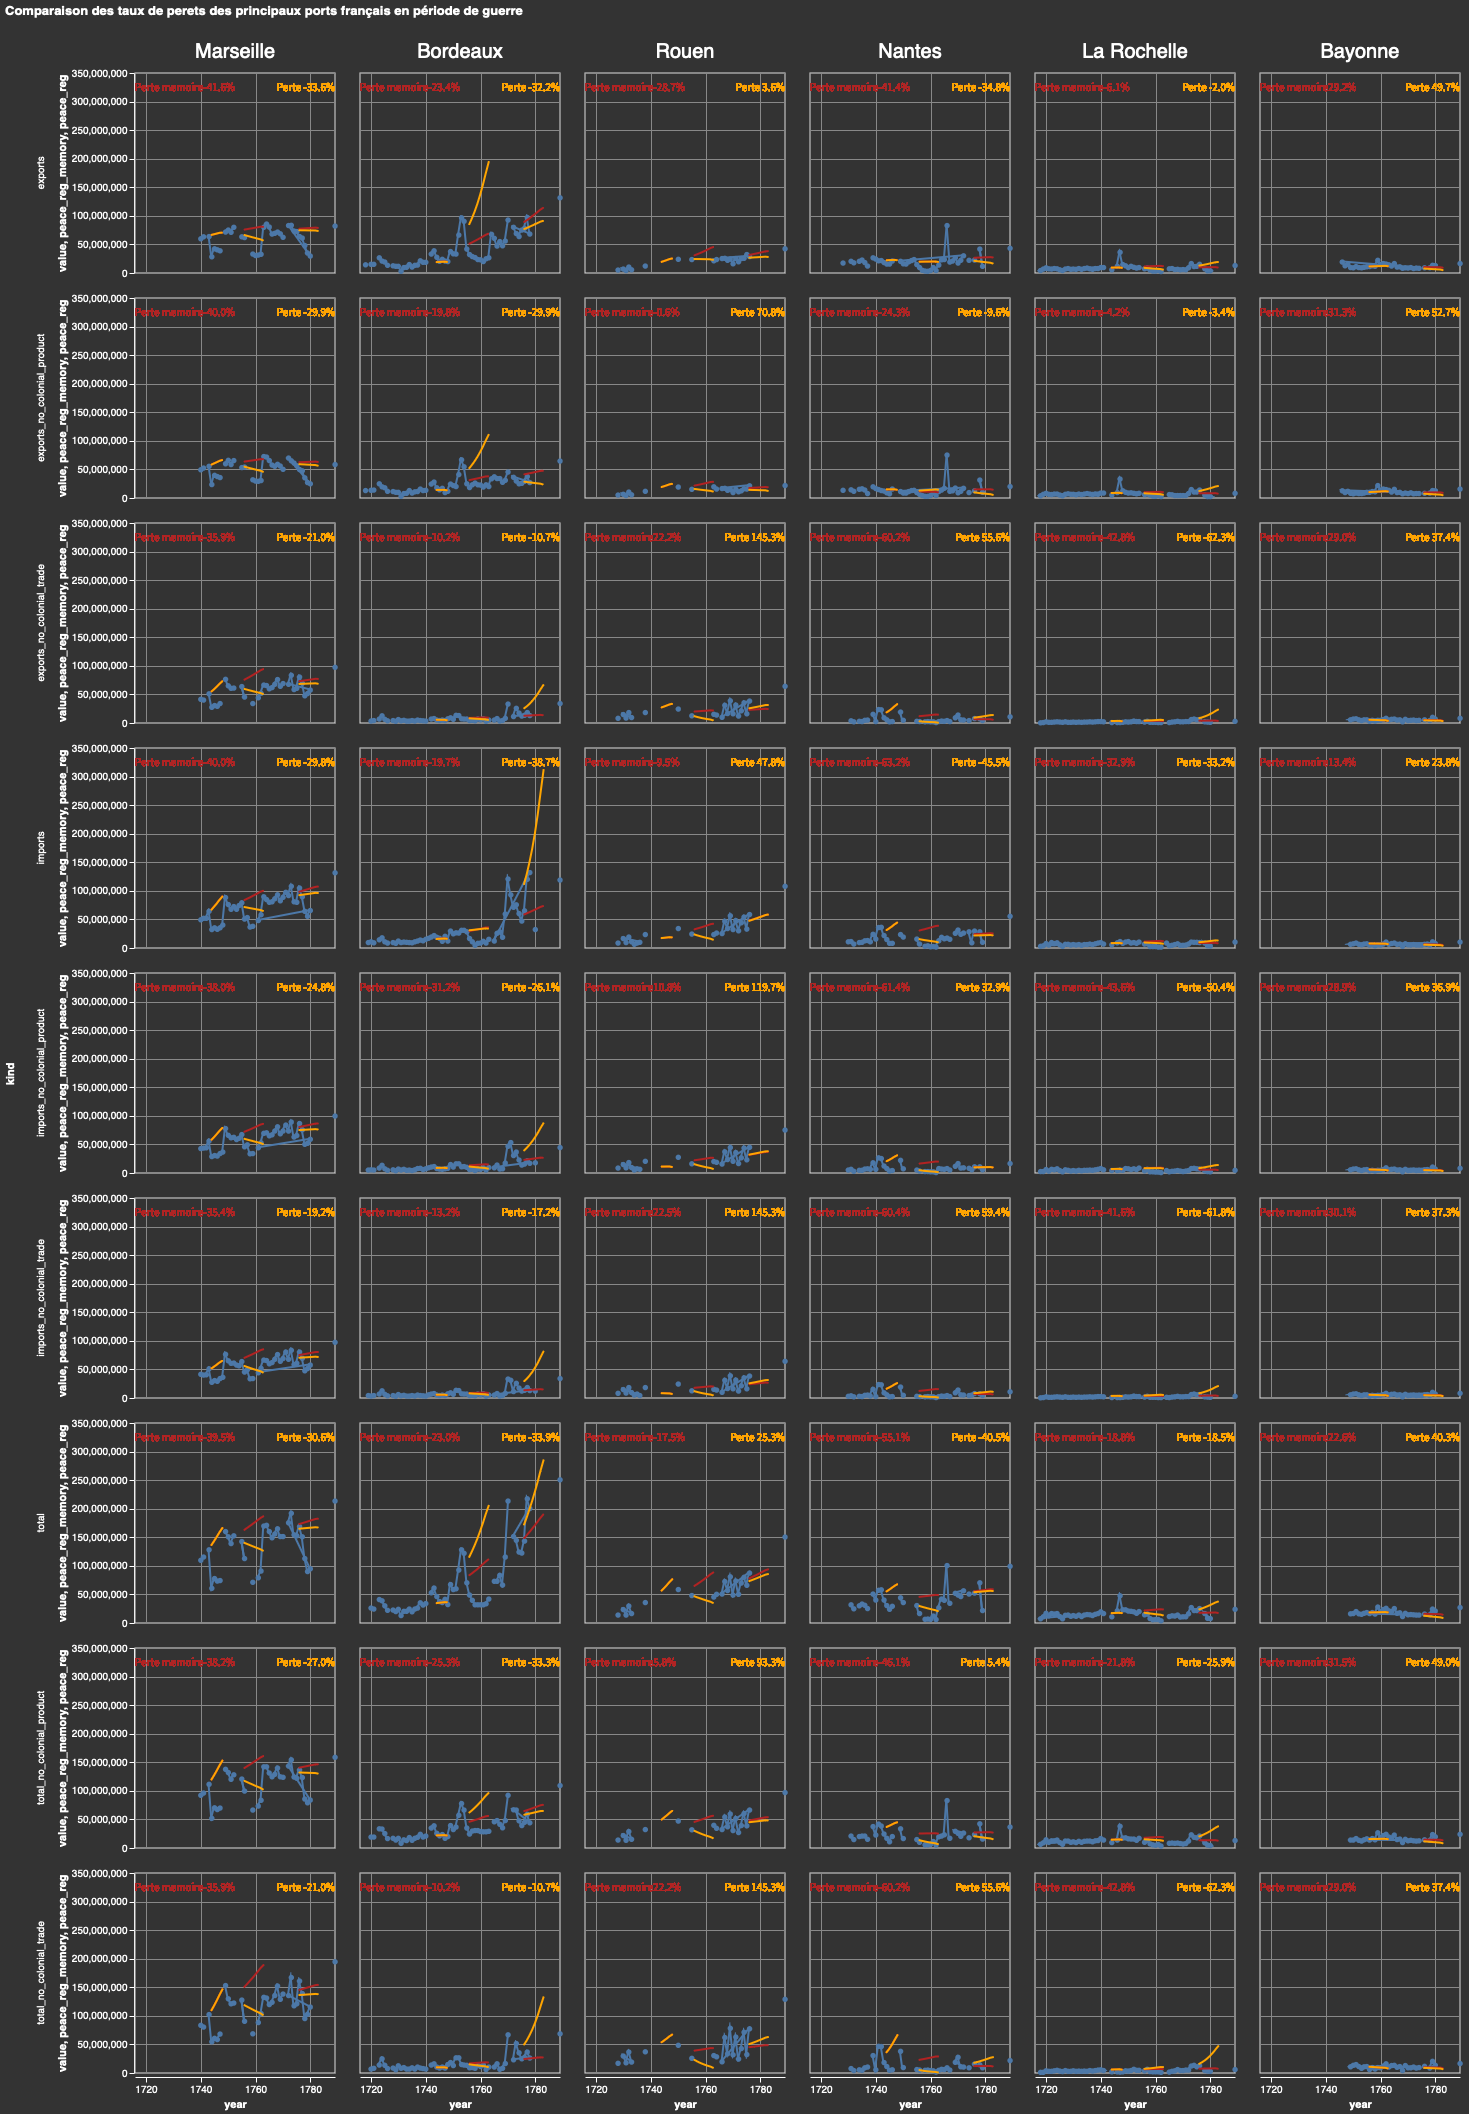

In [5]:

  VegaLite({
    "$schema": "https://vega.github.io/schema/vega-lite/v5.json",
    "title": "Comparaison des taux de perets des principaux ports français en période de guerre",
    "data": {"values": data},
    "facet":{
      "column" : {"field": "direction_ferme", 
                  "header": {"titleFontSize": 0, "labelFontSize": 20},
                  "sort": {"field": "column_order", "order": "ascending"}},
      "row": {"field" : "kind"}
    },
    "spec":{
    "layer": [
      {
        "mark": {
          "type": "line",
          "point": True
        },
        "encoding": {
          "x": {
            "field": "year",
            "type": "temporal"
          },
          "y": {
            "field": "value",
            "type": "quantitative"
          }
        }
      },
      {
        "mark": {
          "type": "line",
          "color": "firebrick"
        },
        "encoding": {
          "x": {
            "field": "year",
            "type": "temporal"
          },
          "y": {
            "field": "peace_reg_memory",
            "type": "quantitative"
          }
        }
      },
      {
        "mark": {
          "type": "line",
          "color": "orange"
        },
        "encoding": {
          "x": {
            "field": "year",
            "type": "temporal"
          },
          "y": {
            "field": "peace_reg",
            "type": "quantitative"
          }
        }
      },
      {
      
      "mark": {
        "type": "text",
        "color": "firebrick",
        "x": "0",
        "align": "left",
        "y": 15,
        "fontSize": 11,
        "font": "sans serif"
      },
      "encoding": {
        "text": {"type": "nominal", "field": "avg_loss_mem"}
      }
    }, {
      
      "mark": {
        "type": "text",
        "color": "orange",
        "x": "width",
        "align": "right",
        "y": 15,
        "fontSize": 11,
        "font": "sans serif"
      },
      "encoding": {
        "text": {"type": "nominal", "field": "avg_loss_no_mem"}
      }
    },

    ]}
  })